# Step 1: Setup and Initial Data Load


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
# Load training and testing datasets with ; separator
df_train = pd.read_csv('BikeRentalDaily_train.csv', sep=';')
df_test = pd.read_csv('BikeRentalDaily_test.csv', sep=';')

# Join datasets for data exploration
df_full = pd.concat([df_train, df_test], ignore_index=True)
print("Training Data Shape:", df_train.shape)
print("Testing Data Shape:", df_test.shape)
print("Combined Data Shape:", df_full.shape)

Training Data Shape: (600, 18)
Testing Data Shape: (132, 18)
Combined Data Shape: (732, 18)


## First general analysis to the data

In [3]:
df_full.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836


In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          732 non-null    int64  
 1   dteday           732 non-null    object 
 2   season           659 non-null    float64
 3   yr               732 non-null    int64  
 4   mnth             732 non-null    int64  
 5   holiday          732 non-null    int64  
 6   weekday          732 non-null    int64  
 7   workingday       732 non-null    int64  
 8   weathersit       732 non-null    int64  
 9   temp             732 non-null    float64
 10  atemp            732 non-null    float64
 11  hum              692 non-null    float64
 12  windspeed        732 non-null    float64
 13  leaflets         732 non-null    int64  
 14  price reduction  732 non-null    int64  
 15  casual           732 non-null    int64  
 16  registered       732 non-null    int64  
 17  cnt             

# Step 2: Descriptive analysis

In [5]:
df_full.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
count,732.000000,659.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,692.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,365.908470,2.476480,0.500000,6.524590,0.028689,2.867486,0.684426,1.396175,19.814779,0.474352,93.808823,0.183994,741.775956,0.153005,1058.079235,3655.945355,4714.024590
std,211.035856,1.112505,0.500342,3.451948,0.167044,2.095577,0.465062,0.544980,7.317049,0.162850,21.381071,0.117027,166.967863,0.360239,2862.520234,1559.200902,3506.692931
min,1.000000,1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,1.000000,2.365200,0.079070,0.000000,-1.000000,458.000000,0.000000,2.000000,20.000000,22.000000
25%,183.750000,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.491675,0.337891,77.841075,0.134341,598.000000,0.000000,315.750000,2499.000000,3157.500000
50%,365.500000,2.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,19.933300,0.485158,93.350550,0.179727,739.500000,0.000000,711.500000,3660.000000,4544.500000
75%,548.250000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.208325,0.608289,109.390650,0.233205,887.000000,0.000000,1095.500000,4769.750000,5946.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,34.466700,0.840896,145.875000,0.507463,1032.000000,1.000000,47138.000000,6946.000000,53021.000000


## Partial conclusions from the descriptive analysis

1. A Missing Category: The weathersit description lists 4 categories. However, the describe() output shows its max value is 3.0. This tells you that Category 4 never occurs in this dataset.

2. Normalized Features: temp (Temperature) and atemp (Feeling Temperature) have values between 0 and 1, so they are normalized.

3. Some issues:

- Missing values:
-- season: count is 659 (out of 732). We have 73 missing values.
-- hum: count is 692 (out of 732). We have 40 missing values.

- Outliers and data errors
-- weekday: The day of the week min value of -1.0 is an impossible value, an error.
-- hum (Humidity): The humidity max value of 145.27 this seems to be impossible (because humidity cannot exceed 100%). But after research exist Supersaturation Conditions those values can be OK.
-- windspeed: The min value of -1.0 is also impossible. Wind speed cannot be negative.
-- casual: The max of 47 138 could be an outlier compared to the 75th percentile (1095) and needs to be analyzed to decide if it's an error or a real extreme event.

- Features that needs to be transformed
-- Categorical Encoding: season, mnth, weekday, and weathersit are categorical but are stored as numbers (1, 2, 3...). Many AI models will incorrectly think that "season 4 (fall)" is 4x "better" or "larger" than "season 1 (winter)." which is totally wrong.

- Features to be Removed (Feature Selection)
-- instant: This is a record index. It has zero predictive value and must be removed.
-- dteday: This column wasn't in describe() output because it's a date object. The columns yr, mnth, and weekday are already extracted from it, but maybe the day of the month can have a predictive value and should be extracted from it.

# Step 3: Visualizations

## Histograms

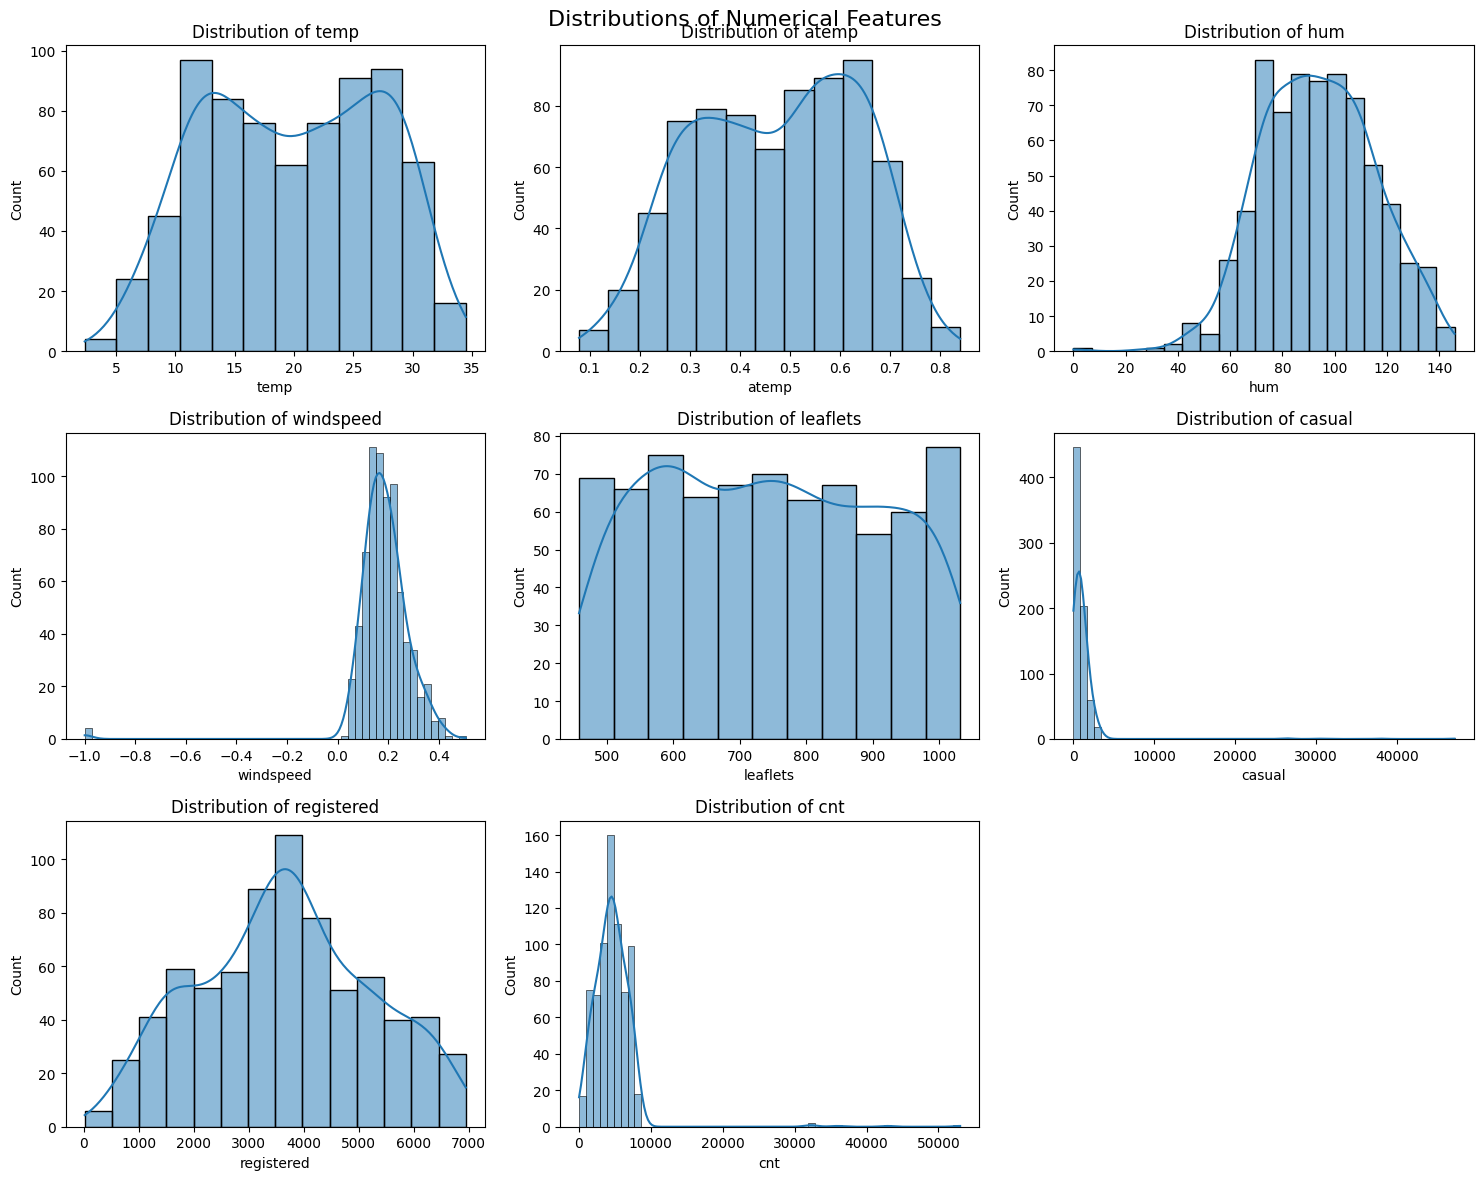

In [6]:
# Define the list of numerical columns
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'leaflets', 'casual', 'registered', 'cnt']

# Create a figure and a grid of axes
# We have 8 plots, so a 3x3 grid (9 spots) is good.
# 'figsize' makes the whole image larger
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Add a main title for the entire figure
fig.suptitle('Distributions of Numerical Features', fontsize=16)

# 'axes' is a 2D array (3x3). .flatten() turns it into a simple 1D list (9 spots)
# This makes it easy to loop through
axes_list = axes.flatten()

# Loop through your columns, and also get an index (i)
for i, col_name in enumerate(numerical_cols):
    
    # Tell Seaborn to draw the plot on a *specific* subplot
    # 'ax=axes_list[i]' is the key part!
    sns.histplot(df_full[col_name], kde=True, ax=axes_list[i])
    
    # Add a title to the *subplot*
    axes_list[i].set_title(f'Distribution of {col_name}')

# We have 9 spots but only 8 plots. This hides the last, empty spot.
axes_list[-1].set_visible(False)

# This cleans up the layout so titles and labels don't overlap
plt.tight_layout()

# Add a bit of space for the main title
plt.subplots_adjust(top=0.95)

# Show the single, combined plot
plt.show()

### Partial conclusions from the histograms 
- windspeed: We can see a distinct bar at -1.0, which is impossible for wind speed.
- casual and cnt are extremely right-skewed. Almost all their data is on the far left, with a long, thin tail going to the right.
- windspeed: The plot shows a spike at -1.0. This confirms the error that was detected before.

## Boxplots

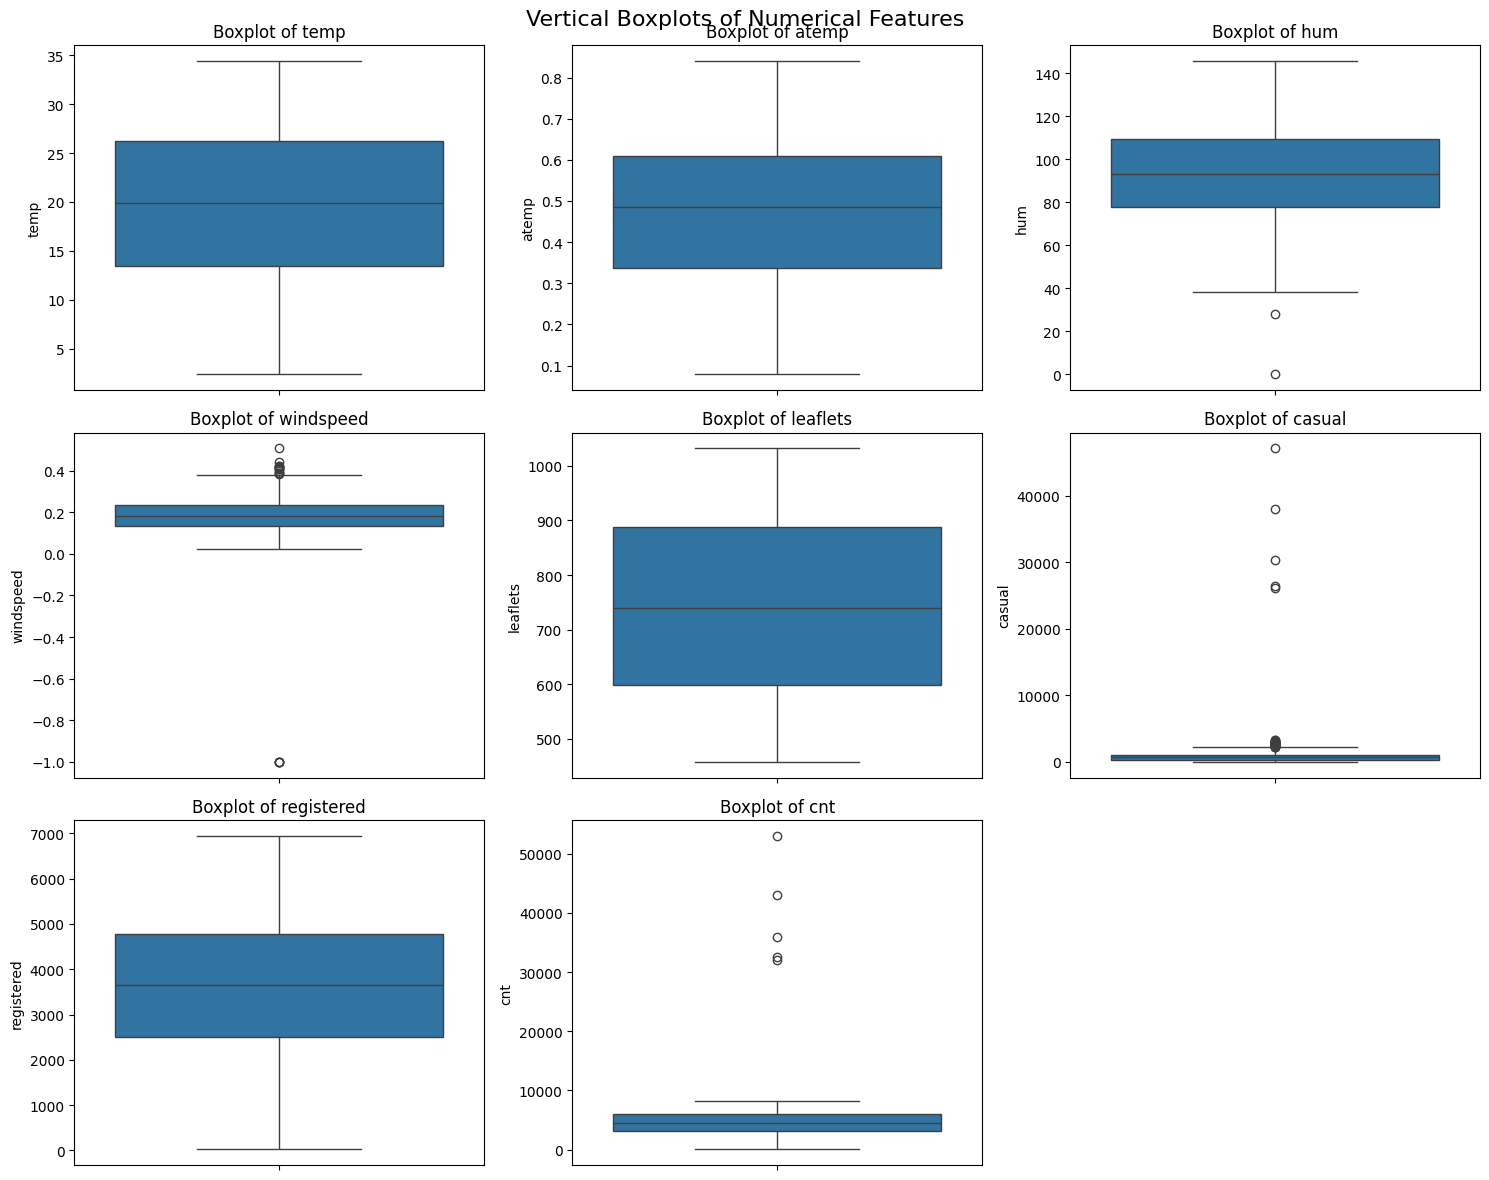

In [7]:
# Define the list of numerical columns
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'leaflets', 'casual', 'registered', 'cnt']

# Create a figure and a grid of axes (3x3 grid for 8 plots)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Add a main title for the entire figure
fig.suptitle('Vertical Boxplots of Numerical Features', fontsize=16)

# Flatten the 3x3 grid of axes into a 1D list
axes_list = axes.flatten()

# Loop through each numerical column
for i, col_name in enumerate(numerical_cols):
    
    # *** THIS IS THE CHANGE ***
    # Use y= instead of x= to make the boxplot vertical
    sns.boxplot(y=df_full[col_name], ax=axes_list[i])
    
    # Set the title for each subplot
    axes_list[i].set_title(f'Boxplot of {col_name}')

# Hide the last, unused subplot
axes_list[-1].set_visible(False)

# Clean up the layout
plt.tight_layout()

# Adjust for the main title
plt.subplots_adjust(top=0.95)

# Show the final combined plot
plt.show()

### Partial conclusions from the boxplots 
- windspeed: The plot shows the main data (the box) is all positive, but there is one single outlier dot at -1.0.
- The right-skewness in the casual and cnt variables is a direct result of the outliers. These few, massive values are pulling the average far away from the median and stretching the entire distribution's tail to the right.



## Bar charts

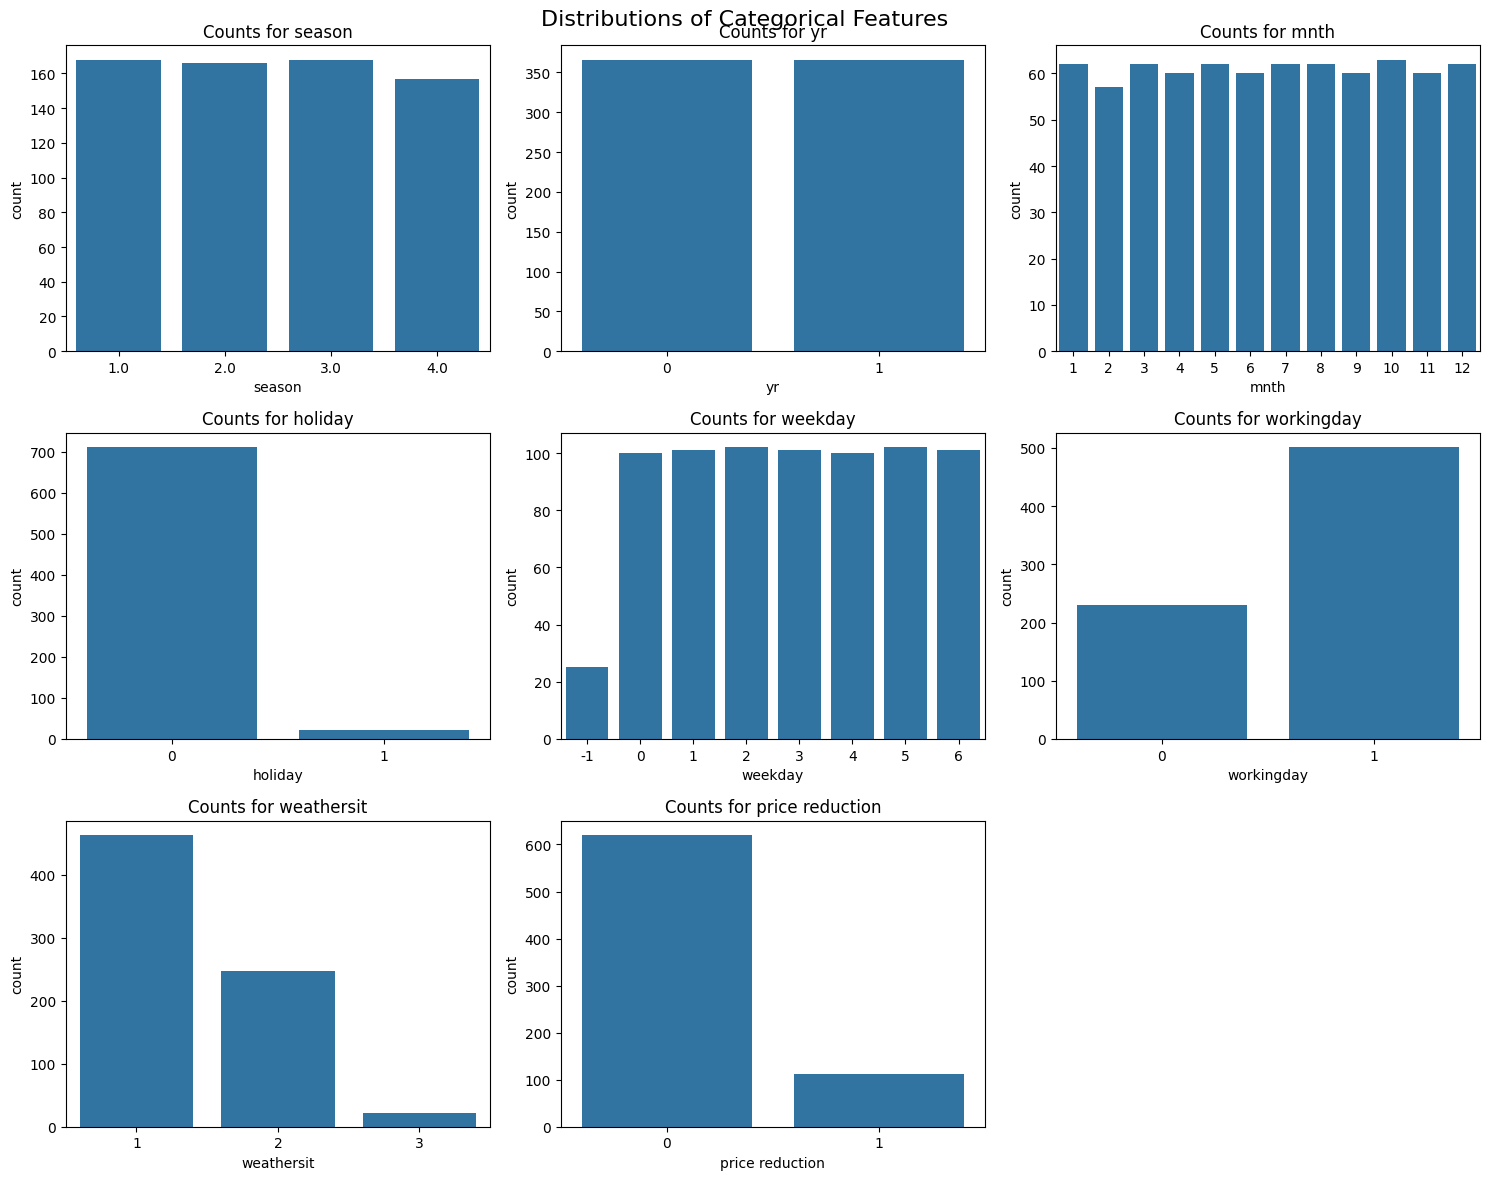

In [8]:
# Define the list of all your categorical columns
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'price reduction']

# Create a figure and a grid of axes (3x3 grid for 8 plots)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Add a main title for the entire figure
fig.suptitle('Distributions of Categorical Features', fontsize=16)

# Flatten the 3x3 grid of axes into a 1D list
axes_list = axes.flatten()

# Loop through each categorical column
for i, col_name in enumerate(categorical_cols):
    
    # Create the countplot on the specific subplot (ax)
    sns.countplot(x=df_full[col_name], ax=axes_list[i])
    
    # Set the title for each subplot
    axes_list[i].set_title(f'Counts for {col_name}')

# Hide the last, unused subplot (the 9th one)
axes_list[-1].set_visible(False)

# Clean up the layout to prevent titles/labels from overlapping
plt.tight_layout()

# Adjust for the main title
plt.subplots_adjust(top=0.95)

# Show the final combined plot
plt.show()

### Partial conclusions from the bar charts 
- holiday:This feature is highly imbalanced. There are a lot more examples of Not a Holiday than of Holiday. An AI model might struggle to learn the "holiday" effect. However, it's normal because there are fewer holiday days. We must be aware of the imbalance and check if affect the models.
- workingday: This is imbalanced. There are significantly more 1 (Working Day) than 0 (Weekend/Holiday) entries. This makes sense, as there are 5 working days for every 2 weekend days.
- weathersit (Weather Situation): It clearly shows bars for categories 1 (Clear), 2 (Mist), and 3 (Light Rain/Snow), but there is no bar for category 4. This confirms that the "Heavy Rain" weather situation never occurs in the dataset.
- price reduction: This feature is highly imbalanced, similar to holiday. Almost all days have a "0" (No Price Reduction). This is another rare event feature, just like holiday.However, it has sense because the price reductions are not so frequent.

## Correlation heatmap

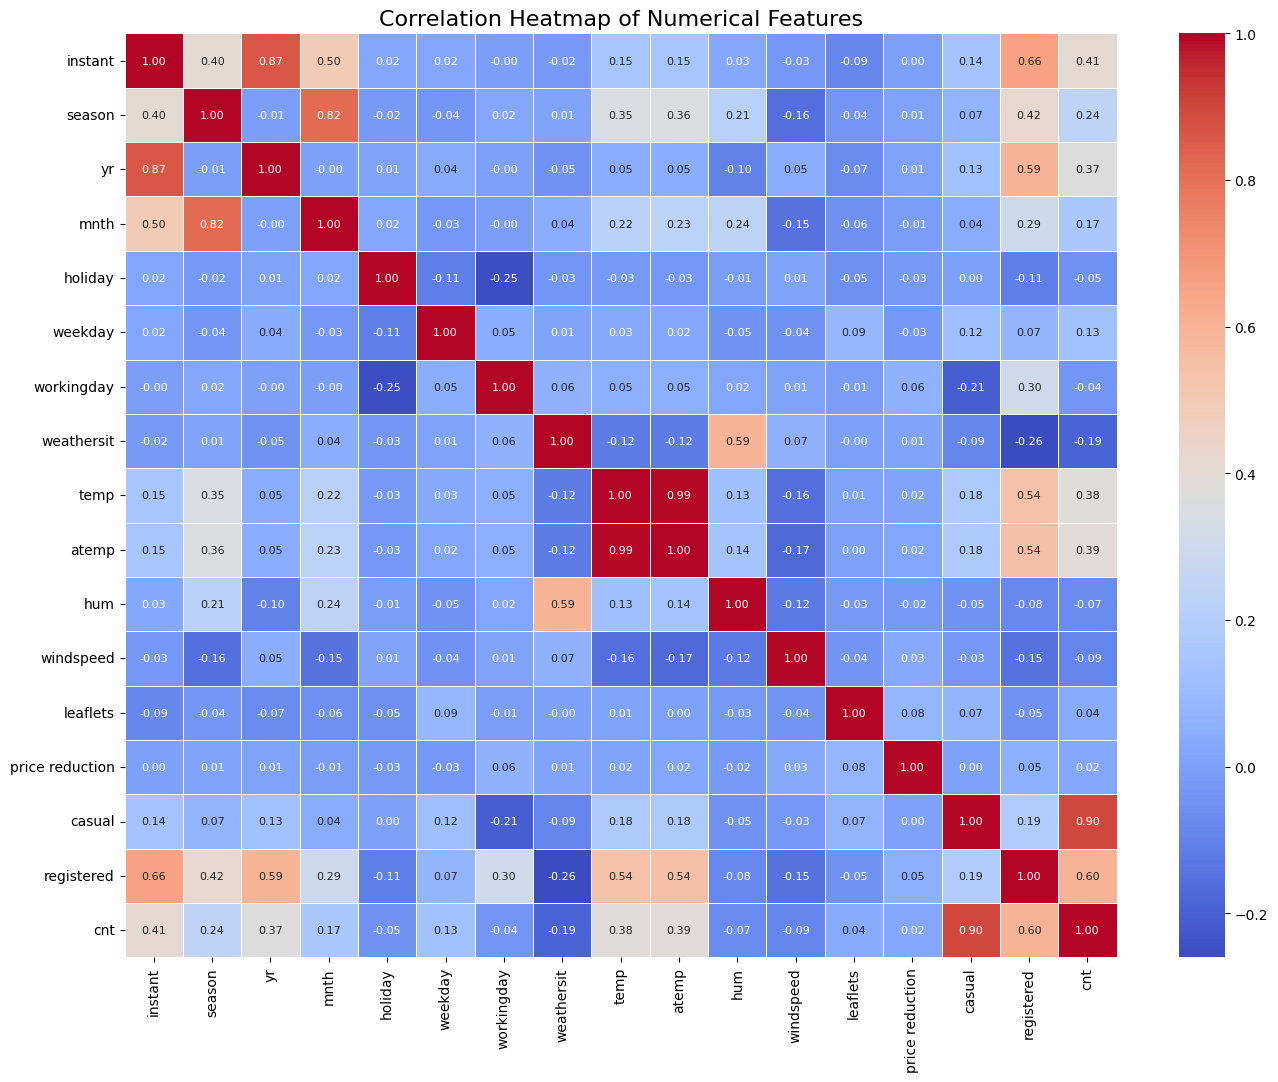

In [9]:
# Calculate the correlation matrix (this part is correct)
corr_matrix = df_full.corr(numeric_only=True)

# Create the heatmap
plt.figure(figsize=(16, 12)) # <--- Make the figure much larger (e.g., 16 inches wide, 12 inches tall)
sns.heatmap(
    corr_matrix,
    annot=True,         # Show the correlation values on the heatmap
    cmap='coolwarm',    # Color map
    fmt='.2f',          # <--- Format annotations to 2 decimal places (e.g., 0.99 instead of 0.991234)
    linewidths=.5,      # Add lines between cells for better separation
    annot_kws={"size": 8} # <--- Adjust annotation font size if still overlapping
)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16) # Add a title
plt.show()

### Partial conclusions from the correlation heatmap
- Target Leakage: The correlation between cnt and registered is 0.6, and the correlation between cnt and casual is 0.9. This confirms that cnt = registered + casual. These features are part of the answer we are trying to predict. We must remove registered and casual from your features. Keeping them will result in a model that looks perfect but is completely useless in the real world.
- Redundant Features: The correlation between temp and atemp is 0.99. This means temp and atemp provide the exact same information. We must remove atemp.
- Good Predictive Features: temp, yr, and leaflets all show a meaningful relationship with the total bike rentals (cnt) and should definitely be kept as features.

# Final conclusions
1. Missing Values
-- season: Has 73 missing values.
-- hum: Has 40 missing values.
- Action: Both columns will require imputation (e.g., filling with mode or mean) before modeling.

2. Outliers
- Data Errors: Impossible values were found and must be corrected.
    - weekday: Has some -1.0 values.
    - windspeed: Has a -1.0 value.
- Statistical Outliers: casual and cnt have extreme high-value outliers. These outliers are the direct cause of the severe skew in these features.

3. Features to be Transformed
-- Categorical Features: season, mnth, weekday, and weathersit must be one-hot encoded so models don't treat them as ordered numbers.
-- dteday: The columns yr, mnth, and weekday are already extracted from it, but maybe the day of the month can have a predictive value and should be extracted from it.

4. Features to be Removed (Feature Selection)
-- casual and registered: Must be removed. They add up to cnt and represent target leakage.
-- atemp: Must be removed. It's redundant due to a 0.99 correlation with temp.
-- instant: Must be removed. It's a useless record index.
-- dteday: Must be removed, but only after extracting a new day_of_month feature from it.

5. Other Insights
-- Missing Category: The weathersit category 4 (Heavy Rain) is defined but never occurs in the data.
-- Imbalanced Data: holiday, workingday, and price reduction are all highly imbalanced (one category is very rare), which is expected but important for modeling.
-- Good Predictors: temp, yr, and leaflets show the strongest correlation with the cnt target and will be key features.


# Learnings from Coding
- Seaborn is a good option for graphs. It's a high-level library that makes it simple to create complex, statistically-aware, and professional-looking plots like histograms, boxplots, and heatmaps with just one line of code.
- It's a good idea to generate multiple related graphs in the same image. By using Matplotlib's subplots, we created a grid. This made it much easier to compare the distributions of all our numerical (or categorical) features at a single glance.
- Loops can automate repetitive plotting. Instead of writing separate code for all 8 numerical histograms, we created a for loop to iterate through our list of columns and generate all the plots automatically on the subplot grid.